In [10]:
# python imports
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

In [11]:
# Load in the data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df['Target'] = iris.target

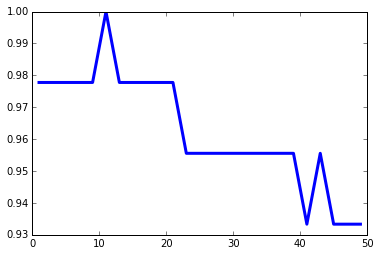

In [13]:
# splitting data and target classifications into train and test sets and run KNN classification
def knn(data, target, n_neighbors):

    # split the data into train and test datasets
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=12)

    # Loop through each neighbors value and append the scores
    scores = []
    for n in n_neighbors:
        clf = neighbors.KNeighborsClassifier(n)
        clf.fit(X_train, y_train)
        scores.append(clf.score(X_test, y_test))
        
    return scores

# use function on iris data
n_neighbors = n_neighbors = range(1, 51, 2)
scores = knn(iris.data, iris.target, n_neighbors)

# plot result
plt.plot(n_neighbors, scores, linewidth=3.0)

In [ ]:
2. Use the sklearn package to implement cross-validation for your classifier. Use 5 folds for your cross-validation.

In [18]:
def xvalidate(data, target, n_neighbor):
    clf = neighbors.KNeighborsClassifier(n_neighbor, weights='uniform')
    clf.fit(data, target)
    scores = cross_val_score(clf, data, target, cv=5)
    return scores

def mean(values):
    tot = 0
    for v in values:
        tot += v
    return tot / len(values)

for x in range(1, 51, 2):
    xvalidate_scores = xvalidate(iris.data, iris.target, x)
    print xvalidate_scores
    print mean(xvalidate_scores)

[ 0.96666667  0.96666667  0.93333333  0.93333333  1.        ]
0.96
[ 0.96666667  0.96666667  0.93333333  0.96666667  1.        ]
0.966666666667
[ 0.96666667  1.          0.93333333  0.96666667  1.        ]
0.973333333333
[ 0.96666667  1.          0.96666667  0.96666667  1.        ]
0.98
[ 0.96666667  1.          0.96666667  0.93333333  1.        ]
0.973333333333
[ 0.93333333  1.          1.          0.96666667  1.        ]
0.98
[ 0.93333333  1.          0.96666667  0.96666667  1.        ]
0.973333333333
[ 0.93333333  1.          0.93333333  0.96666667  1.        ]
0.966666666667
[ 0.93333333  1.          0.93333333  0.96666667  1.        ]
0.966666666667
[ 0.93333333  1.          0.93333333  0.96666667  1.        ]
0.966666666667
[ 0.93333333  1.          0.93333333  0.96666667  1.        ]
0.966666666667
[ 0.93333333  1.          0.93333333  0.93333333  1.        ]
0.96
[ 0.93333333  0.96666667  0.93333333  0.96666667  1.        ]
0.96
[ 0.9         0.96666667  0.93333333  0.93333333 

In [33]:
print len(iris.data)
max_neighbors = int(len(iris.data) / 2)
neighbor_scores = {}
for x in range(1, max_neighbors, 1):
    xvalidate_scores = xvalidate(iris.data, iris.target, x)
    #print xvalidate_scores
    avg = mean(xvalidate_scores)
    neighbor_scores[x] = avg

#print neighbor_scores
max_value = max(neighbor_scores.values())
max_index = neighbor_scores.values().index(max_value)

print max_index, max_value

150
5 0.98


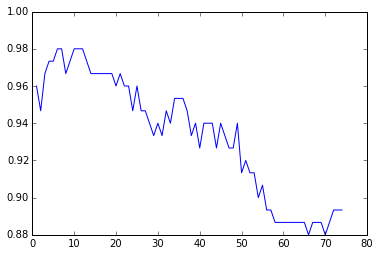

In [34]:
plt.plot(neighbor_scores.keys(), neighbor_scores.values())

In [36]:
def my_xvalidate(data, target, folds):
    data_indices = range(0, len(data), 1)
    print data_indices
    
my_xvalidate(iris.data, iris.target, 5)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]
